# ニューラルネットワーク

## パーセプトロンからニューラルネットワークへ

### 図3-1 ニューラルネットワークの例

<function matplotlib.pyplot.show(*args, **kw)>

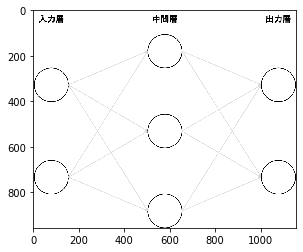

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread("github-deep-learning-from-scratch/images/3-1.png")
plt.imshow(img)
plt.show

### 図3-3 バイアスを明示的に示したパーセプトロン

$$
y = h(b+w1x1+w2x2)
$$

$$
    \mathrm{h}(x) =
        \begin{cases}
            0 \quad (x \leqq 0) \\
            1 \quad (x > 0) \\
        \end{cases}
$$

<function matplotlib.pyplot.show(*args, **kw)>

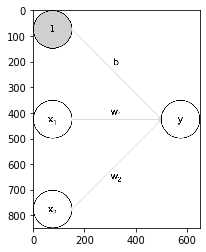

In [2]:
img = imread("github-deep-learning-from-scratch/images/3-3.png")
plt.imshow(img)
plt.show

- h(x): 活性化関数(activation function)。入力信号の総和を出力信号人変換する関数
    - 入力信号の総和がどのように活性化するか(どのように発火するか)を決定する役割

### 図3-4 活性化関数によるプロセスを明示的に示したパーセプトロン

$$
a=b+w1x1+w2x2
$$

$$
y=h(a)
$$

<function matplotlib.pyplot.show(*args, **kw)>

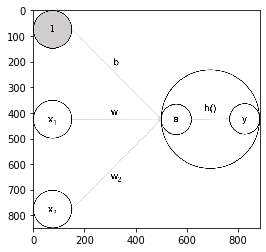

In [3]:
img = imread("github-deep-learning-from-scratch/images/3-4.png")
plt.imshow(img)
plt.show

## 活性化関数

- 閾値を境にして出力が切り替わる関数
    - 「ステップ関数」、「階段関数」とも呼ばれる
    - 「パーセプトロンでは、活性化あ関数にステップ関数を利用している」
- 活性化関数をステップ関数から別の関数に変更することで、ニューラルネットワークノン世界へと進むことができる！

### シグモイド関数 (Sigmoid Function)

$$
h(x)=\frac{1}{1+exp(-x)}
$$

- exp(-x): exp^-x
- e: ネイピア数。2.7182...の実数を表す

### ステップ関数の実装

In [4]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

- 上の実装だと、浮動小数点数を含む実数しか扱えない
    - NumPyの配列を引数に取ることができない

### NumPy配列へ対応したステップ関数の実装

In [5]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [6]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [7]:
y = x > 0
y, y.dtype

(array([False,  True,  True]), dtype('bool'))

In [8]:
y = y.astype(np.int)
y

array([0, 1, 1])

- astypeメソッドを使うことで、NumPy配列の型を引数に指定した型に変換可能
- NumPyのこのトリックを使うことで、NumPy配列への対応を実現

### ステップ関数のグラフ

In [9]:
import numpy as np
import matplotlib.pylab as plt

In [10]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

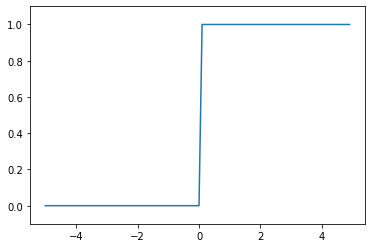

In [11]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()

### シグモイド関数の実装

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
x = np.array([-1.0, 1.0, 2.0])

In [14]:
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

- シグモイド関数の実装が、NumPy配列に対応しているのは、NumPyのブロードキャストのおかげ
    - スカラ値とNumPy配列での演算がブロードキャスト機能により行われ、各要素同士で演算ができている

In [15]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [16]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

### シグモイド関数のグラフ

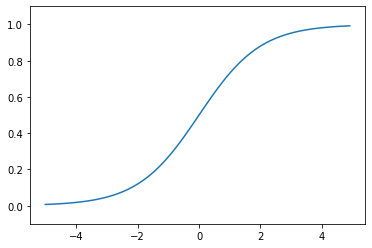

In [17]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲の指定
plt.show()

### シグモイド関数とステップ関数の比較

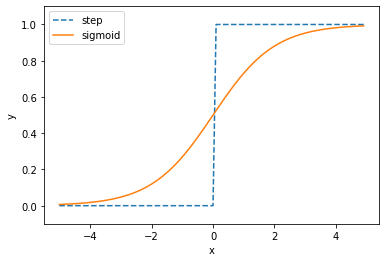

In [18]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)
plt.plot(x, y1, linestyle='--', label='step')
plt.plot(x, y2, label='sigmoid')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-0.1, 1.1) # y軸の範囲の指定
plt.legend()
plt.show()

- 違い = 滑らかさ
    - シグモイド関数: 入力に対して連続的に出力が変化 = 水車
    - ステップ関数: 0を境に急に出力が変化 = 鹿威し
    
- 共通点
    1. 入力が小さい時に出力0に近く、大きい時に出力1に近くなる構造
    2. 非線形関数である --> ニューラルネットワークでは活性化関数に非線形関数を用いる必要がある(線形関数を用いてはならない)
        - 線形関数を用いるとそうを深くする意味がなくなる(どんなに層を深くしても、それと同じことを行う「隠れ層のないネットワーク」が必ず存在してしまう)

$$
activation: h(x)=cx  \\
3LNet: y(x)=h(h(h(x)))  \\
calc: y(x)=c*c*c*x=a(x)  \\
s.t. a=c^3
$$

### ReLU (Rectified Linear Unit)

- 最近、ニューラルネットワークの活性化関数としてシグモイド関数に代わり広く使われている
- 入力が0を超えていれば、素のn入力をそのまま出力し。0以下なら0を出力する

$$
    \mathrm{h}(x) =
        \begin{cases}
            x \quad (x > 0) \\
            0 \quad (x \leqq 0) \\
        \end{cases}
$$

### ReLUの実装

In [19]:
def relu(x):
    return np.maximum(0, x)

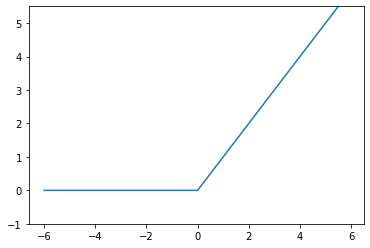

In [20]:
x = np.arange(-6.0, 6.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5) # y軸の範囲の指定
plt.show()

## 多次元配列の計算

### 多次元配列

In [21]:
import numpy as np

In [22]:
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [23]:
A.shape

(4,)

In [24]:
A.shape[0]

4

In [25]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [26]:
np.ndim(B) # 次元の確認

2

In [27]:
B.shape # 3x2の行列, Matrix(Row x Column)

(3, 2)

### 行列の積

In [28]:
A = np.array([[1, 2], [3, 4]])
A.shape

(2, 2)

In [29]:
B = np.array([[5, 6], [7, 8]])
B.shape

(2, 2)

In [30]:
np.dot(A, B) # np.dot: ドット積, 行列積

array([[19, 22],
       [43, 50]])

- 行列積の計算の注意点(1)
    - np.dot(A, B) /= np.dot(B, A)

In [31]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A.shape

(2, 3)

In [32]:
B = np.array([[1, 2], [3, 4], [5, 6]])
B.shape

(3, 2)

In [33]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

- 行列積の計算の注意点(2)
    - 行列Aの1次元目の要素数(列/Column数)と行列Bの0次元目の要素数(行/Row数)が同じでないと計算できない

In [34]:
# 計算できない例
C = np.array([[1, 2], [3, 4]])
C.shape

(2, 2)

In [35]:
A.shape

(2, 3)

In [36]:
# np.dot(A, C)
# ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# <ipython-input-51-bb5afb89b162> in <module>
# ----> 1 np.dot(A, C)

# <__array_function__ internals> in dot(*args, **kwargs)

# ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [37]:
A = np.array([
    [1, 2], 
    [3, 4], 
    [5, 6]
])
A.shape

(3, 2)

In [38]:
B = np.array([7, 8])
B.shape

(2,)

In [39]:
np.dot(A, B)

array([23, 53, 83])

### サイズ感
    - [ベクトル] x [ベクトル] = スカラ
    - [行列] x [ベクトル] = [ベクトル]
    - [ベクトル] x [行列] x [ベクトル] = スカラ

In [40]:
# サイズ感
x_size = np.array([1, 2]) # 1x2のベクトル (縦向きのベクトル)
y_size = np.array([3, 4]) # 1x2のベクトル (縦向きのベクトル)
X_size = np.array([[1, 2], [3, 4]]) # 2x2の行列

In [41]:
# [ベクトル] x [ベクトル] = スカラ = 
np.dot(x_size, y_size)

11

In [42]:
# [行列] x [ベクトル] = [ベクトル]
np.dot(X_size, y_size)

array([11, 25])

In [43]:
# [ベクトル] x [行列] x [ベクトル] = スカラ
mid = np.dot(X_size, y_size)
np.dot(x_size.T, mid) # 要転置

61

### ニューラルネットワークの行列の積

In [44]:
X = np.array([1, 2])
X.shape

(2,)

In [45]:
W = np.array([
    [1, 3, 5], 
    [2, 4, 6]
])
print(W)

[[1 3 5]
 [2 4 6]]


In [46]:
W.shape

(2, 3)

<function matplotlib.pyplot.show(*args, **kw)>

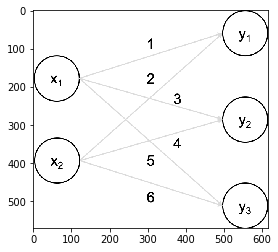

In [47]:
img = imread("github-deep-learning-from-scratch/images/3-14.png")
plt.imshow(img)
plt.show

In [48]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


### ポイント
- np.dot(多次元配列のドット積)を使えば、Yの要素数にかかわらず、一度の演算で計算できる
    - ニューラルネットワークの計算 = 行列の計算としてまとめて行える(各層の計算は行列の積)    

## 3層ニューラルネットワークの実装

<function matplotlib.pyplot.show(*args, **kw)>

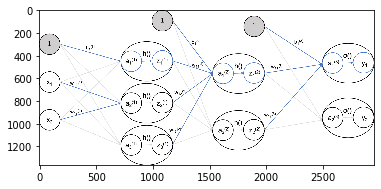

In [49]:
img = imread("github-deep-learning-from-scratch/images/3-20.png")
plt.imshow(img)
plt.show

- 表記について
    - (N): 第N層
        -w^(1): 第1層目の重み
    - _m n: _次層のm番目のニューロン 前層のn番目のニューロン
        -w_1 2: 次層の1番目のニューロン 前層の2番目のニューロン

#### 第1層目の活性化関数の数式(前層1番目のニューロン)
$$
a_{ 1}^{(1)} =w_{11}^{(1)}x_1+w_{12}^{(1)}x_2+b_{1}^{(1)}
$$

$$
A^{(1)}=XW^{(1)}+B^{(1)} \\
    \boldsymbol{A^{(1)} }=
        \left[\begin{array}{ccc}
            a_{1}^{(1)} & a_{2}^{(1)} & a_{3}^{(1)}
        \end{array}\right],
    \boldsymbol{X} =
        \left[\begin{array}{ccc}
            x_{1} & x_{2}
        \end{array}\right], 
    \boldsymbol{B^{(1)}} =
        \left[\begin{array}{ccc}
            b_{1}^{(1)} & b_{2}^{(1)} & b_{3}^{(1)}
        \end{array}\right], \\
    \boldsymbol{W^{(1)}} =
        \left[\begin{array}{ccc}
            w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)}
            w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}
        \end{array}\right]
$$

In [50]:
X = np.array([1.0, 0.5])
W1 = np.array([
    [0.1, 0.3, 0.5], 
    [0.2, 0.4, 0.6]
])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [51]:
A1 = np.dot(X, W1) + B1

In [52]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [53]:
Z1 = sigmoid(A1)

In [54]:
print(A1) # 隠れ層での重み付き和(重み付き信号とバイアスの総和)
print(Z1) # 活性化関数(ここではシグモイド関数を使用)で変換された信号

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [55]:
W2 = np.array([
    [0.1, 0.4],
    [0.2, 0.5],
    [0.3, 0.6]
])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [56]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [57]:
print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [58]:
def identity_function(x): # 恒等関数を定義
    return x # 入力をそのまま出力する関数

In [59]:
W3 = np.array([
    [0.1, 0.3],
    [0.2, 0.4]
])
B3 = np.array([0.1, 0.2])

In [60]:
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # もしくは、Y = A3

In [61]:
print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


### ポイント
- 出力層で活用する活性化関数について
    - 解く問題の性質に応じて決定
        - 回帰問題: 恒等関数
        - 2クラス分類: シグモイド関数
        - 多クラス分類: ソフトマックス関数

### 実装のまとめ

In [62]:
# 重みとバイアスの初期化
def init_network():
    network = {} # 各層の重みとバイアスを格納するための空ディクショナリを用意。
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

# 入力信号が出力へと変換されるプロセス
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 出力層の設計

- ニューラルネットワークは「分類問題」「回帰問題」どちらにも利用可能
    - 「分類問題」: データがどのクラスに属するか
        - 出力層のニューロンの数はとくべき問題に応じて適宜決める必要あり
        - 「分類問題」では、分類したいクラス数 == 出力層のニューロンの数、とするのが一般的
    - 「回帰問題」: ある入力データから、(連続的な)数値の予測を行う

## 恒等関数とソフトマックス関数

<function matplotlib.pyplot.show(*args, **kw)>

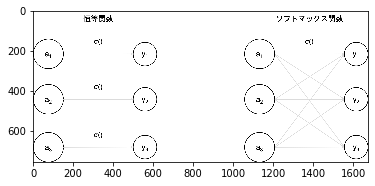

In [63]:
img = imread("github-deep-learning-from-scratch/images/3-22.png")
plt.imshow(img)
plt.show

### ソフトマックス関数の数式

$$
y_k=\frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)}
$$

- exp(x): e^xを表す指数関数
- eは2.7182...のネイピア数

In [64]:
a = np.array([0.3, 2.9, 4.0])

In [65]:
exp_a = np.exp(a) # 指数関数
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [66]:
sum_exp_a = np.sum(exp_a) # 指数関数の和
print(sum_exp_a)

74.1221542101633


In [67]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [68]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = npn.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## ソフトマックス関数の実装上の注意点

### オーバーフロー

- ソフトマックス関数の実装では、指数関数の計算を行うがあ、その際、指数関数の値が容易に大きな値になりうる。
    - e^10 = 22,026.46...
    - e^100 = 2.688117142E43 (0が40個以上並ぶ)
    - e^1000 = inf (無限大)
- コンピュータで「数」を扱う場合、その数値は4 byte, 8 byteといった有限のデータ幅に治められることになるため、数には有効桁数が存在する。
- つまり、表現できる数値のは安易に制限がある。したがって、とても大きな値は表現できない。

$$
y_k=\frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)}=\frac{Cexp(a_k}{C\sum_{i=1}^{n}exp(a_i)}=\frac{exp(a_k+logC)}{\sum_{i=1}^{n}exp(a_i+logC)}=\frac{exp(a_k+C')}{\sum_{i=1}^{n}exp(a_i+C')}
$$

- Cという任意の定数を分子と分母にかけているが、これは両方に同じ定数を乗算しているため、同じ計算を行っていることになる
- 上の数式は、ソフトマックスの指数関数の計算を行う際は、何らかの定数を足し算しても、引き算しても結果わ変わらないことを示している
- C'にはどのような値を用いることもできるが、オーバーフロー対策としては、入力信号のん中で最大の値を用いるのが一般的
- 下記はオーバーフローが原因で、正しく計算されていない例

In [69]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # ソフトマックス関数の計算

/Users/yunambu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/yunambu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [70]:
c = np.max(a) # 1010
a - c # オーバーフロー対策

array([  0, -10, -20])

In [71]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [72]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # オーバーフロー対策を追加
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### ソフトマックス関数の特徴

- ソフトマックス関数の出力は、0から1の間の実数
- ソフトマックス関数の出力の総和は1
    - この性質からソフトマックス関数の出力を「確率」として解釈できるため、確率的(統計的)な対応ができる
- ニューラルネットワークのクラス分類では、一般的に、出力の一番大きいニューロンに相当するクラスだけを認識結果とする
- ソフトマックス関数を適用しても出力の一番大きいニューロンの場所は変わらないため、出力層のソフトマックス関数を省略できる
    - 指数関数の計算は、コンピュータにそれなりに負荷をかけるため、省略するのが一般的(推論フェーズ)
- 注意点
    - ソフトマックス関数を適用しても各要素の大小関係は変わらない
        - 指数関数(y=exp(x))が単調増加する関数であることに起因

In [73]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
y

array([0.01821127, 0.24519181, 0.73659691])

In [74]:
np.sum(y)

1.0

## 手書き数字認識

- 実践 (手書き数字の分類)
    - 学習は既に完了
        - 訓練データ(学習データ)を使って重みパラメータの学習
    - 推論処理のみを実装
        - 先に学習したパラメータを使って、入力データの分類を行う
        - 推論処理をニューラルネットワークの「順伝播 (Forward Propagation)」っと呼ぶ

### MNISTデータセット

- 簡単な実験から発表される研究まで様々な場所で利用されている最も有名なデータセット
    - 0 - 9 までの数字画像から構成
        - 訓練画像 == 60,000
        - テスト画像 == 10,000
        - 28x28のグレー画像(1チャンネル)
        - 各ピクセルは0 - 255の値を取る
- このデータセットを用いて学習を行い、学習したモデルでテスト画像に対してどれだけ正しく分類できるかを計測

In [75]:
import sys, os

In [76]:
# 親ディレクトリのファイルをインポートするための設定
sys.path.append(os.pardir)

In [77]:
os.chdir('deep-learning-from-scratch/dataset/')

In [78]:
from dataset.mnist import load_mnist # MNISTデータの読み込み

- MNISTデータの呼び出す時の構文
    - (訓練画像, 訓練ラベル), (テスト画像, テストラベル) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
        - normalize (正規化): 入力画像を0.0 - 1.0の値に正規化するかどうか。
            - Falseの場合、0 - 255の値を取る
            - ニューラルネットワークの入力データに対して何らかの決まった変換を行うことを前処理(pre-processing)と呼び、実践的によく用いられる。
                - 識別性能の向上、学習の高速化
                - 実際には、データ全体の分布を考慮した前処理を行う
                    - データ全体の平均や標準偏差を利用して、データ全体が0を中心に分布するように移動させたり(中心化)、データの広がりをある範囲に収めたりといった正規化を行う。それ以外にも、データ全体の分布の消え上を均一にする(白色化, whitening)などがある
        - flatten: 入力画像を平らにする、つまり、1次元配列にするかどうか。
            - Falseの場合、1x28x28の3次元配列
            - Trueの場合、784個の要素からなる1次元配列として格納
        - one_hot_label: ラベルをone-hot表現として格納するか
            - one_hot表現の例: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]のように正解ラベルのみ1で、それ以外は0の配列のこと
            - Falseの場合、7, 2, のように単純に正解となるラベルを格納
            - Trueの場合、ラベルはone_hot表現として格納

In [79]:
# 最初の呼び出し。
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [80]:
# それぞれのデータの形状を出力
print(x_train.shape)

(60000, 784)


In [81]:
print(t_train.shape)

(60000,)


In [82]:
print(x_test.shape)

(10000, 784)


In [83]:
print(t_test.shape)

(10000,)


#### 豆知識
- Python "pickle"機能
    - プログラムの実行チュのオブジェクトをファイルとして保存する
    - 一度保存したpickleファイルをロードすると、プログラムの実行中だった時のオブジェクトを即座に復元可

In [84]:
# MNIST画像の表示
!pip install pillow
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.unit8(img))
    pil_img.show()

In [85]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]

In [86]:
print(label)

5


In [87]:
print(img.shape)

(784,)


In [88]:
img = img.reshape(28, 28) # 形状をもとの画像サイズに変形
print(img.shape)

(28, 28)


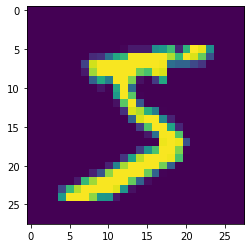

In [89]:
# img_show(img): image_showを使おうとするとペイント3Dを起動して失敗するので、pyplotを使って表示
plt.imshow(img)

In [90]:
plt.show()

In [91]:
Image.fromarray(img) # NumPytとして格納された画像データをPIL用のデータオブジェクトへ変換

### ニューラルネットワークの推論処理

In [92]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    # pickleファイルに保存された学習済みの重みパラメータの読み込み
    with open("/Users/yunambu/Desktop/deep-learning-from-scratch/ch03/sample_weight.pkl", 'rb') as f: 
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 =  network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [93]:
import pickle

In [94]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)): # xに格納された画像データを1枚ずつ取り出し
    y = predict(network, x[i]) # 分類
    p = np.argmax(y) # 最も確率の高い要素のインデックスを取得
    
    if p == t[i]:
        accuracy_cnt += 1

In [95]:
!pwd

/Users/yunambu/Desktop/deep-learning-from-scratch/dataset


In [96]:
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### バッチ処理

In [97]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [98]:
x.shape

(10000, 784)

In [99]:
x[0].shape # 28x28の1枚の画像

(784,)

In [100]:
x[1].shape

(784,)

In [101]:
x[2].shape

(784,)

In [102]:
W1.shape

(784, 50)

In [103]:
W2.shape

(50, 100)

In [104]:
W3.shape

(100, 10)

#### バッチ処理前
$$
X_{784}  \\
W1_{784x50}  \\
W2_{50x100}  \\
W3_{100x10}  \\
Y_{10}
$$

#### バッチ処理後
$$
X_{100x784}  \\
W1_{784x50}  \\
W2_{50x100}  \\
W3_{100x10}  \\
Y_{100x10}
$$

- このバッチ処理では100枚分のデータをまとめて入力データとし、出力も100x10の形状
    - x[0]とy[0]には0番目の画像とその推論結果、x[1]とy[1]には1番目の画像とその推論結果というように格納
- このようなまとまりのある入力データをバッチ(batch, 束)と呼ぶ
- バッチ処理を使うことで、1枚あたりの処理時間を大幅に削減できるという計算上の利点がある
    - 処理時間を短縮できる理由は、数値計算を扱うライブラリの多くは、大きな配列の計算を効率よく処理できるよう高度な最適化が行われているため
    - 同時に、ニューラルネットワークの計算におけるボトルネックのデータ転送についても、バッチ処理によってパス帯域の負荷を軽減することができる(データ読み込みに対して演算の割合を多くする)
    - 大きな配列を一度に計算する＞＞＞分割した小さい配列を少しずつ計算する

### バッチ処理による実装

In [110]:
x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size): 
    # 入力データのi番目からi+batch_n番目までのデータの取り出し
    # この例では、x[0:100], x[100:200]のように、先頭から100枚ずつバッチとして取り出す
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    # 最大値のインデックスを1次元目の要素毎に見つけるよう、軸(axis)を指定
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

In [113]:
print("Accuracy: " + str(float(accuracy_cnt / len(x))))

Accuracy: 0.9352


### 補足

#### リストの挙動

In [114]:
list( range(0,10) )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [115]:
list( range(0, 10, 3) )

[0, 3, 6, 9]

#### argmax関数、オプションaxis=1

In [116]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])

In [117]:
y = np.argmax(x, axis=1)

In [118]:
print(y)

[1 2 1 0]


### バッチ単位での分類結果

In [120]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)

[ True  True False  True]


In [121]:
np.sum(y==t)

3

## まとめ

- ニューラルネットワークとパーセプトロンの共通点
    - ニューロンの信号が階層的に伝播
- ニューラルネットワークとパーセプトロンの相違点
    - 次のニューロンへ信号を送信する際に、信号を変化させる活性化関数
        - ニューラルネットワーク: 滑らかに変化する「シグモイド関数」や「ReLU」
            - 回帰問題の出力層: 恒等関数
            - 分類問題の出力層: ソフトマックス関数(分類するクラス数の合計が1になるように表示＝確率)
        - パーセプトロン: 急に変化する「ステップ関数」
- ニューラルネットワークの実装上のコツ
    - バッチ処理を使って、入力データをまとまりとして扱うことで、バッチ単位で推論処理を行うことができ、計算を高速化できる
    
- 数式
    - シグモイド関数
$$
h(x)=\frac{1}{1+exp(-x)}
$$
    - ReLU関数 (Rectified Linear Unit)
$$
    \mathrm{h}(x) =
        \begin{cases}
            x \quad (x > 0) \\
            0 \quad (x \leqq 0) \\
        \end{cases}
$$
    - ソフトマックス関数
$$
y_k=\frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)}
$$